In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("data/spaceship-titanic/train.csv")
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
print(df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [4]:
# Apaga linhas com mais de 20% dos valores nulos
df = df[df.isnull().mean(axis=1) <= 0.2]

### Explorando valores das colunas

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [6]:
for col in num_cols:
    print(f"Coluna: {col}")
    print(df[col].describe())  # estatísticas básicas
    print(f"Valores nulos: {df[col].isnull().sum()}")

    # Comparação de medidas centrais
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0] if not df[col].mode().empty else None

    print(f"Média  : {mean_val}")
    print(f"Mediana: {median_val}")
    print(f"Moda   : {mode_val}")

    print("=========================================================")
    print("=========================================================")


Coluna: Age
count    8502.000000
mean       28.833686
std        14.488328
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64
Valores nulos: 174
Média  : 28.833686191484357
Mediana: 27.0
Moda   : 24.0
Coluna: RoomService
count     8495.000000
mean       224.907946
std        667.277226
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
Valores nulos: 181
Média  : 224.90794585050028
Mediana: 0.0
Moda   : 0.0
Coluna: FoodCourt
count     8496.000000
mean       458.294845
std       1612.265649
min          0.000000
25%          0.000000
50%          0.000000
75%         76.250000
max      29813.000000
Name: FoodCourt, dtype: float64
Valores nulos: 180
Média  : 458.2948446327684
Mediana: 0.0
Moda   : 0.0
Coluna: ShoppingMall
count     8472.000000
mean       173.909821
std        605.124872
min          0.000000
25%      

In [7]:
for col in cat_cols:
    print(f"Coluna: {col}")
    print(f"Número de valores distintos: {df[col].nunique()}")
    print(f"Valores nulos: {df[col].isnull().sum()}")
    print(df[col].value_counts())
    print("=========================================================")
    print("=========================================================")


Coluna: PassengerId
Número de valores distintos: 8676
Valores nulos: 0
PassengerId
0001_01    1
6133_01    1
6139_05    1
6139_04    1
6139_03    1
          ..
3124_01    1
3123_01    1
3121_01    1
3120_02    1
9280_02    1
Name: count, Length: 8676, dtype: int64
Coluna: HomePlanet
Número de valores distintos: 3
Valores nulos: 196
HomePlanet
Earth     4595
Europa    2129
Mars      1756
Name: count, dtype: int64
Coluna: CryoSleep
Número de valores distintos: 2
Valores nulos: 211
CryoSleep
False    5434
True     3031
Name: count, dtype: int64
Coluna: Cabin
Número de valores distintos: 6552
Valores nulos: 194
Cabin
G/734/S     8
G/1368/P    7
F/1194/P    7
B/201/P     7
B/11/S      7
           ..
E/231/S     1
G/545/S     1
G/543/S     1
B/106/P     1
C/178/S     1
Name: count, Length: 6552, dtype: int64
Coluna: Destination
Número de valores distintos: 3
Valores nulos: 176
Destination
TRAPPIST-1e      5906
55 Cancri e      1800
PSO J318.5-22     794
Name: count, dtype: int64
Coluna: VI

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ===============================
# 0) Cópia e remoções básicas
# ===============================
dfp = df.copy()

# alvo (0/1) e remoção de colunas não preditivas
y = dfp['Transported'].map({True: 1, False: 0}).astype('int8')
dfp = dfp.drop(columns=['Transported', 'PassengerId', 'Name'])

# ===============================
# 1) Quebrar Cabin em Deck / Num / Side
# ===============================
def split_cabin(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan, np.nan], index=['Deck','CabinNum','Side'])
    parts = str(s).split('/')
    # garante 3 partes
    parts += [np.nan] * (3 - len(parts))
    return pd.Series(parts[:3], index=['Deck','CabinNum','Side'])

dfp[['Deck','CabinNum','Side']] = dfp['Cabin'].apply(split_cabin)
dfp.drop(columns=['Cabin'], inplace=True)
dfp['CabinNum'] = pd.to_numeric(dfp['CabinNum'], errors='coerce')

# ===============================
# 2) Definir grupos de colunas
# ===============================
num_cols_base = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum']
bin_cols      = ['CryoSleep', 'VIP']
cat_cols      = ['HomePlanet', 'Destination', 'Deck', 'Side']

# ===============================
# 3) Imputação
# ===============================
# 3.1 Numéricas -> mediana
for c in num_cols_base:
    dfp[c] = dfp[c].fillna(dfp[c].median())

# 3.2 Binárias -> moda e para 0/1
for c in bin_cols:
    if dfp[c].isnull().any():
        dfp[c] = dfp[c].fillna(dfp[c].mode()[0])
    dfp[c] = dfp[c].astype(bool).astype('int8')

# 3.3 Categóricas -> moda
for c in cat_cols:
    if dfp[c].isnull().any():
        dfp[c] = dfp[c].fillna(dfp[c].mode()[0])

# ===============================
# 4) Redução de assimetria nas despesas (opcional, recomendado)
# ===============================
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for c in spend_cols:
    # log1p: lida bem com zeros (log(0+1)=0)
    dfp[c] = np.log1p(dfp[c])

# ===============================
# 5) One-Hot nas categóricas de baixa cardinalidade
# ===============================
dfp = pd.get_dummies(dfp, columns=cat_cols, drop_first=False, dtype='int8')

# ===============================
# 6) Escalonamento para tanh
#    Escolha 1: StandardScaler (z-score)
# ===============================
scaler = StandardScaler()

# ATENÇÃO: em modelagem real, use scaler.fit(X_train[num_cols]) e depois transforme
num_cols_final = ['Age', 'CabinNum'] + spend_cols
dfp[num_cols_final] = scaler.fit_transform(dfp[num_cols_final])

# (Se preferir MinMax para [-1,1], troque as duas linhas acima por:)
# scaler = MinMaxScaler(feature_range=(-1, 1))
# dfp[num_cols_final] = scaler.fit_transform(dfp[num_cols_final])

# ===============================
# 7) Conjunto final
# ===============================
X = dfp  # todas as features numéricas já prontas
# y já está definido como 0/1
print(X.shape, y.shape)
print("Nulos restantes em X?", X.isnull().sum().sum())


(8676, 25) (8676,)
Nulos restantes em X? 0


/var/folders/x9/_d9131zd0kv_7kqrvjfvld9m0000gn/T/ipykernel_34466/3708549578.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfp[c] = dfp[c].fillna(dfp[c].mode()[0])
/var/folders/x9/_d9131zd0kv_7kqrvjfvld9m0000gn/T/ipykernel_34466/3708549578.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfp[c] = dfp[c].fillna(dfp[c].mode()[0])


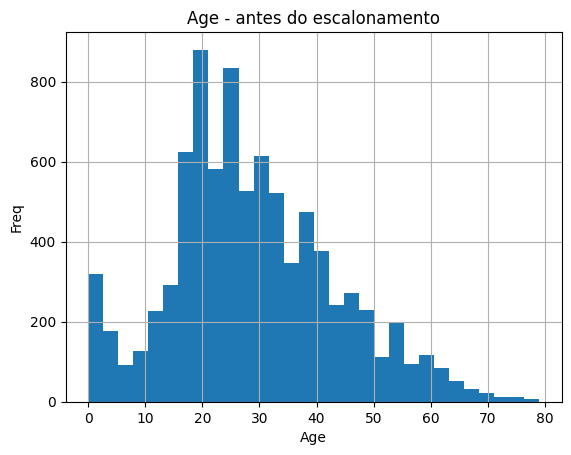

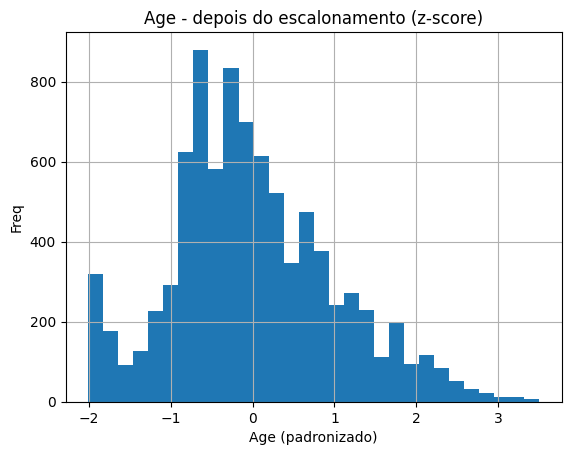

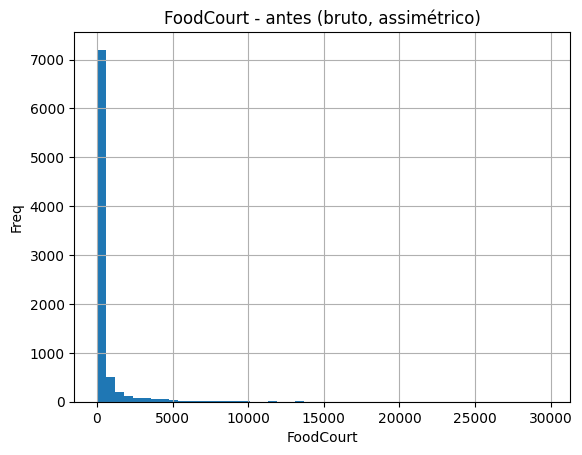

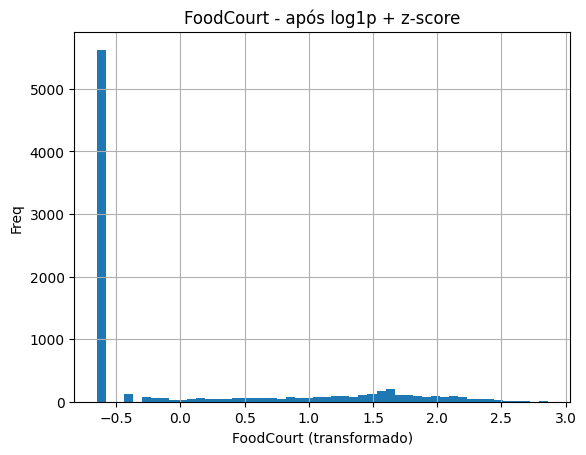

In [9]:
import matplotlib.pyplot as plt

# ---- Age: antes (bruto)
df['Age'].hist(bins=30)
plt.title("Age - antes do escalonamento")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

# ---- Age: depois (z-score)
X['Age'].hist(bins=30)
plt.title("Age - depois do escalonamento (z-score)")
plt.xlabel("Age (padronizado)")
plt.ylabel("Freq")
plt.show()

# ---- FoodCourt: antes (bruto, altamente assimétrico)
df['FoodCourt'].hist(bins=50)
plt.title("FoodCourt - antes (bruto, assimétrico)")
plt.xlabel("FoodCourt")
plt.ylabel("Freq")
plt.show()

# ---- FoodCourt: após log1p + z-score
X['FoodCourt'].hist(bins=50)
plt.title("FoodCourt - após log1p + z-score")
plt.xlabel("FoodCourt (transformado)")
plt.ylabel("Freq")
plt.show()


In [10]:
X.head(10)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,0.711326,0,-0.638230,-0.650345,-0.623215,-0.664376,-0.639889,-1.176597,0,...,0,1,0,0,0,0,0,0,1,0
1,0,-0.334425,0,1.090151,0.134604,0.645463,1.613318,0.746441,-1.176597,1,...,0,0,0,0,0,1,0,0,0,1
2,0,2.035943,1,0.753228,2.138986,-0.623215,2.516585,0.784811,-1.176597,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.293025,0,-0.638230,1.789720,1.681556,2.263357,1.278586,-1.176597,0,...,1,0,0,0,0,0,0,0,0,1
4,0,-0.892158,0,1.463938,0.802798,1.333045,1.623669,-0.239791,-1.174624,1,...,0,0,0,0,0,1,0,0,0,1
5,0,1.059909,0,-0.638230,1.457122,-0.623215,1.384764,-0.639889,-1.176597,1,...,0,0,0,0,0,1,0,0,1,0
6,0,-0.194991,0,0.744775,1.851696,-0.083403,-0.664376,-0.639889,-1.172651,1,...,0,0,0,0,0,1,0,0,0,1
7,1,-0.055558,0,-0.638230,-0.650345,-0.623215,-0.664376,-0.639889,-1.176597,1,...,0,0,0,0,0,0,1,0,0,1
8,0,0.432459,0,-0.638230,1.622414,0.502273,1.277608,-0.639889,-1.170678,1,...,0,0,0,0,0,1,0,0,0,1
9,1,-1.031592,0,-0.638230,-0.650345,-0.623215,-0.664376,-0.639889,-1.174624,0,...,0,1,0,0,0,0,0,0,1,0
